# Import Libraries

In [58]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [59]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Install Packages
!pip install app-store-scraper
!pip install wordcloud

#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbkhn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# Data Collection

In [3]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore('us','linkedin','288429040')
a_reviews.review(sleep=1)

2023-10-29 23:50:58,881 [INFO] Base - Initialised: AppStore('us', 'linkedin', 288429040)
2023-10-29 23:50:58,881 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/linkedin/id288429040
2023-10-29 23:51:04,751 [INFO] Base - [id:288429040] Fetched 40 reviews (40 fetched in total)
2023-10-29 23:51:13,477 [INFO] Base - [id:288429040] Fetched 120 reviews (120 fetched in total)
2023-10-29 23:51:23,809 [INFO] Base - [id:288429040] Fetched 180 reviews (180 fetched in total)
2023-10-29 23:51:49,856 [INFO] Base - [id:288429040] Fetched 260 reviews (260 fetched in total)
2023-10-29 23:51:57,820 [INFO] Base - [id:288429040] Fetched 320 reviews (320 fetched in total)
2023-10-29 23:52:13,677 [INFO] Base - [id:288429040] Fetched 400 reviews (400 fetched in total)
2023-10-29 23:52:34,594 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnect

2023-10-30 00:03:40,962 [INFO] Base - [id:288429040] Fetched 2680 reviews (2680 fetched in total)


In [8]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2023-09-30 00:42:10,I hired Zalak to design my site based on two c...,5,False,Greg Ladner,Zalak Patel is a consummate PROFESSIONAL,NaN
1,2023-02-01 01:55:07,Update: LinkedIn heard my prayers and fixed my...,5,True,StrawberryBananaOrange,Love LinkedIn! But the app…,"{'id': 34549269, 'body': 'We appreciate you ta..."
2,2023-10-25 11:39:30,LinkedIn was okay until I became a creator. It...,5,False,smithrof,Better as a creator,NaN
3,2021-06-25 23:06:36,I spent about an hour carefully crafting a rep...,1,False,Jinjarella,Need Auto-Saving for Drafts,"{'id': 23826763, 'body': 'We appreciate you ta..."
4,2021-09-21 15:30:25,After using the application for quite a while ...,1,False,ChanL996,Unprofessional customer service and inaccurate...,NaN


In [9]:
data.shape

(2680, 7)

In [10]:
data.drop(['isEdited','userName'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2023-09-30 00:42:10,Zalak Patel is a consummate PROFESSIONAL,I hired Zalak to design my site based on two c...,5
1,2023-02-01 01:55:07,Love LinkedIn! But the app…,Update: LinkedIn heard my prayers and fixed my...,5
2,2023-10-25 11:39:30,Better as a creator,LinkedIn was okay until I became a creator. It...,5
3,2021-06-25 23:06:36,Need Auto-Saving for Drafts,I spent about an hour carefully crafting a rep...,1
4,2021-09-21 15:30:25,Unprofessional customer service and inaccurate...,After using the application for quite a while ...,1


In [11]:
#Storing Data
data.to_csv('linkedin_reviews.csv',index=False)

In [12]:
data.to_excel('linkedin_reviews.xlsx', index=False)

# Exploratory Data Analysis

In [13]:
data = pd.read_csv('linkedin_reviews.csv')

In [14]:
data.shape

(2680, 4)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2680 non-null   object
 1   title   2680 non-null   object
 2   review  2680 non-null   object
 3   rating  2680 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 83.9+ KB


In [16]:
data.describe()

,rating
count,2680.000000
mean,2.555224
std,1.506961
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [17]:
data.describe(include='object')

,date,title,review
count,2680,2680,2680
unique,2680,2522,2680
top,2023-09-30 00:42:10,Buggy,I hired Zalak to design my site based on two c...
freq,1,16,1


<h3> Analysis of Rating column </h3>

In [18]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1    983
2    467
3    476
4    267
5    487
Name: rating, dtype: int64

In [19]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    36.68
2    17.43
3    17.76
4     9.96
5    18.17
Name: rating, dtype: float64

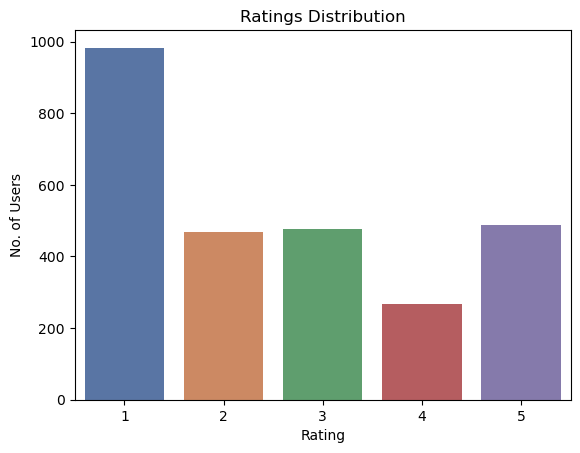

In [20]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [21]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [22]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [23]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [24]:
data.head()

,rating,complete_review
0,5,Zalak Patel is a consummate PROFESSIONAL .I hi...
1,5,Love LinkedIn! But the app… .Update: LinkedIn ...
2,5,Better as a creator .LinkedIn was okay until I...
3,1,Need Auto-Saving for Drafts .I spent about an ...
4,1,Unprofessional customer service and inaccurate...


1. Convert all the reviews to lowercase

In [25]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    zalak patel is a consummate professional .i hi...
1    love linkedin! but the app… .update: linkedin ...
2    better as a creator .linkedin was okay until i...
3    need auto-saving for drafts .i spent about an ...
4    unprofessional customer service and inaccurate...
Name: complete_review, dtype: object

2. Remove Punctuation

In [26]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [27]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [28]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [29]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

NameError: name 'nlp' is not defined

6. Remove certain words

  These are specific to app and won't show any sentiments

In [30]:
words_to_remove = ['linkedin','im','linked','get','page','mobile','one','good','even','number','ui','use','io']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [31]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,5,zalak patel consummate professional hired zala...,2
1,5,love app update heard prayers fixed app longer...,2
2,5,better creator okay became creator takes coura...,2
3,1,need autosaving drafts spent hour carefully cr...,0
4,1,unprofessional customer service inaccurate alg...,0


In [32]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

0    54.10
2    28.13
1    17.76
Name: sentiment, dtype: float64

Data is Imbalanced as about 66% of sentiment is positive, 24% is negative and 9.5% is neutral.

# Reviews Analysis

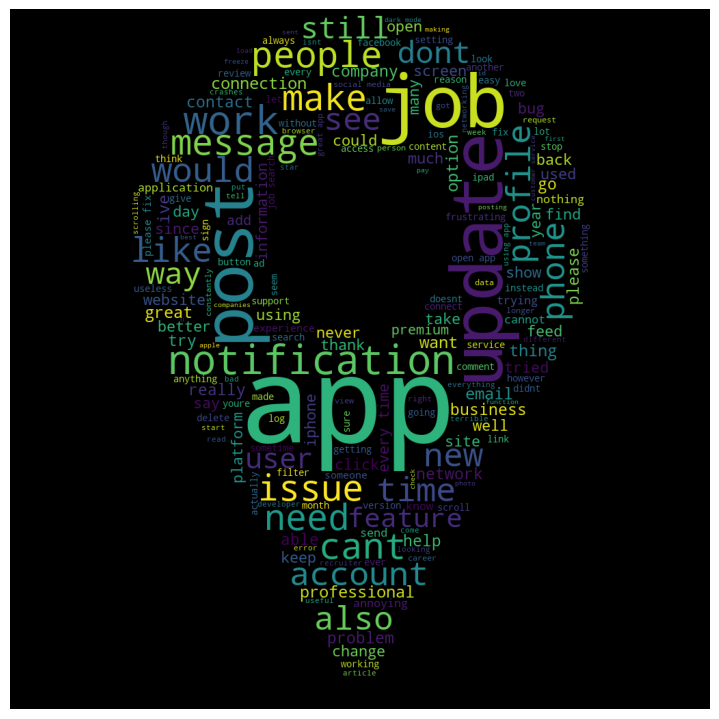

In [33]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [34]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

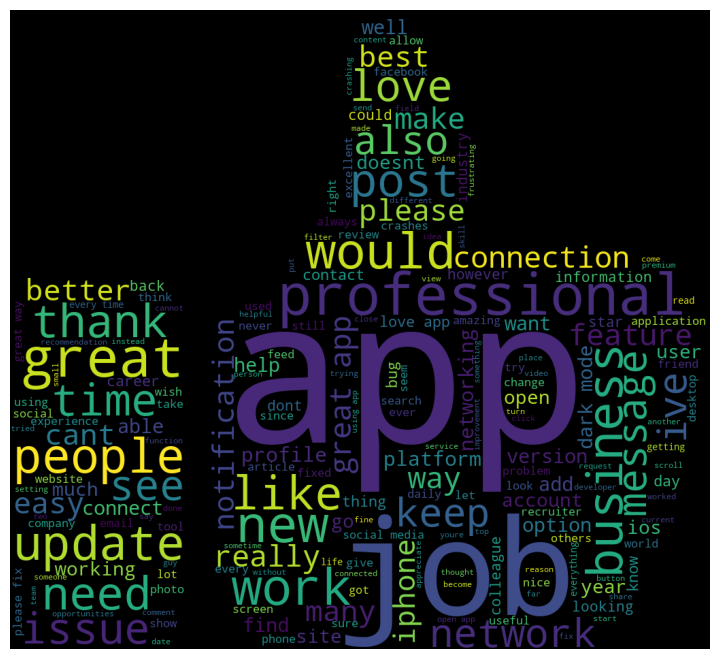

In [35]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 2200, height = 2300,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()
wordcloud.to_file("posid.png")

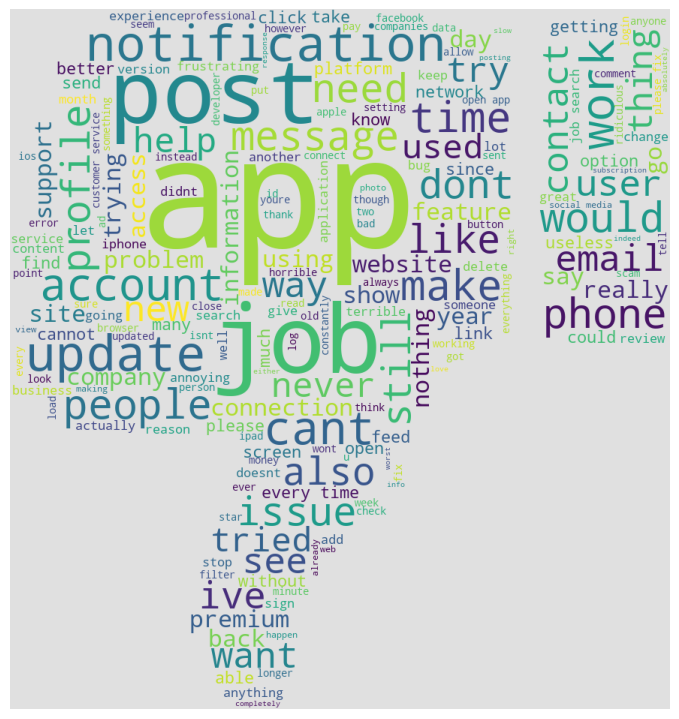

In [36]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#E0E0E0',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

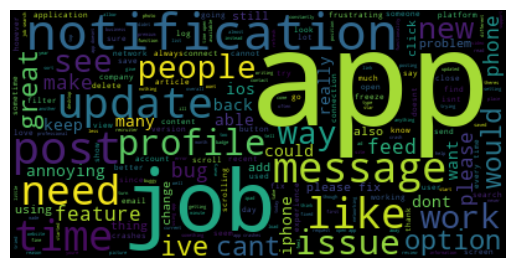

In [37]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model

<h3> Bag of Word Vectorization </h3>

In [38]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

<h3> Handle Imbalanced Data </h3>

In [39]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

<h3> Train Test Split </h3>

In [40]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.15,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3697, 7502)
(653, 7502)
(3697,)
(653,)


<h3> Multinomial Naive Bayes </h3>

In [41]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       286
           1       0.70      0.70      0.70       220
           2       0.56      0.84      0.67       147

    accuracy                           0.69       653
   macro avg       0.69      0.71      0.69       653
weighted avg       0.71      0.69      0.69       653



<h3> Logistic Regression </h3>

In [42]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       194
           1       0.75      0.71      0.73       232
           2       0.81      0.78      0.79       227

    accuracy                           0.77       653
   macro avg       0.77      0.77      0.77       653
weighted avg       0.77      0.77      0.77       653



<h3> Random Forest </h3>

In [43]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       185
           1       0.75      0.67      0.71       246
           2       0.78      0.77      0.78       222

    accuracy                           0.75       653
   macro avg       0.75      0.76      0.75       653
weighted avg       0.75      0.75      0.75       653



<h3> XGBoost </h3>

In [44]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       240
           1       0.81      0.89      0.85       198
           2       0.89      0.90      0.89       215

    accuracy                           0.86       653
   macro avg       0.86      0.86      0.86       653
weighted avg       0.86      0.86      0.86       653



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 87% with the f1-score of 0.85 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on ChatGPT iOS reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in ChatGPT reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.